In [135]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

In [136]:
df2 = pd.read_csv('~/Desktop/coursework/data/stage1/chrom_len.tsv',
                sep='\t')
df2 = df2.iloc[1:-1]
df3 = df2[['chrom', 'Molecule']]
df3.head()

,chrom,Molecule
1,NC_044211.2,Chromosome 1
2,NC_044212.2,Chromosome 1A
3,NC_044213.2,Chromosome 2
4,NC_044214.2,Chromosome 3
5,NC_044215.2,Chromosome 4


In [137]:
df = pd.read_csv('/Users/aleksandradenisova/Desktop/coursework/data/final_data/positions_with_p_val_phylo.csv')
df.head()

,start,cons,inno,non_inno,REF_inno,ALT_noninno,n_inno,n_noninno,n_all,inno_N,inno_-,noninno_N,noninno_-,chrom,file_name,p-values,p_adjust
0,116362,False,False,False,T,"T,C",7.0,25.0,32.0,0.0,1.0,0.0,4.0,NC_044211.2,../chrom_int/NC_044211.2_116362.tsv,0.045,0.191507
1,123675,False,False,False,"A,T,C","T,C",8.0,29.0,37.0,0.0,0.0,0.0,0.0,NC_044211.2,../chrom_int/NC_044211.2_123675.tsv,0.002,0.033857
2,154944,False,False,False,"G,C","T,G,C",7.0,26.0,33.0,0.0,1.0,0.0,1.0,NC_044211.2,../chrom_int/NC_044211.2_154944.tsv,0.349,0.525943
3,231620,False,False,False,"A,T,G","A,G,C",6.0,26.0,32.0,0.0,2.0,0.0,3.0,NC_044211.2,../chrom_int/NC_044211.2_231620.tsv,0.470,0.621435
4,329838,False,False,False,"T,C","T,G,C",8.0,21.0,29.0,0.0,0.0,0.0,2.0,NC_044211.2,../chrom_int/NC_044211.2_329838.tsv,0.184,0.390320


In [138]:
df_fixed2 = pd.merge(df, df3, on = 'chrom')
df_fixed2.head()

,start,cons,inno,non_inno,REF_inno,ALT_noninno,n_inno,n_noninno,n_all,inno_N,inno_-,noninno_N,noninno_-,chrom,file_name,p-values,p_adjust,Molecule
0,116362,False,False,False,T,"T,C",7.0,25.0,32.0,0.0,1.0,0.0,4.0,NC_044211.2,../chrom_int/NC_044211.2_116362.tsv,0.045,0.191507,Chromosome 1
1,123675,False,False,False,"A,T,C","T,C",8.0,29.0,37.0,0.0,0.0,0.0,0.0,NC_044211.2,../chrom_int/NC_044211.2_123675.tsv,0.002,0.033857,Chromosome 1
2,154944,False,False,False,"G,C","T,G,C",7.0,26.0,33.0,0.0,1.0,0.0,1.0,NC_044211.2,../chrom_int/NC_044211.2_154944.tsv,0.349,0.525943,Chromosome 1
3,231620,False,False,False,"A,T,G","A,G,C",6.0,26.0,32.0,0.0,2.0,0.0,3.0,NC_044211.2,../chrom_int/NC_044211.2_231620.tsv,0.470,0.621435,Chromosome 1
4,329838,False,False,False,"T,C","T,G,C",8.0,21.0,29.0,0.0,0.0,0.0,2.0,NC_044211.2,../chrom_int/NC_044211.2_329838.tsv,0.184,0.390320,Chromosome 1


In [139]:
df = pd.DataFrame(df_fixed2[['Molecule', 'chrom']].value_counts(), columns=['counts']).reset_index()
table = pd.pivot_table(df, values=['counts'], index=['Molecule', 'chrom']) 
table.head()

,,counts
Molecule,chrom,
Chromosome 1,NC_044211.2,702
Chromosome 10,NC_044222.2,153
Chromosome 11,NC_044223.2,134
Chromosome 12,NC_044224.2,171
Chromosome 13,NC_044225.2,140


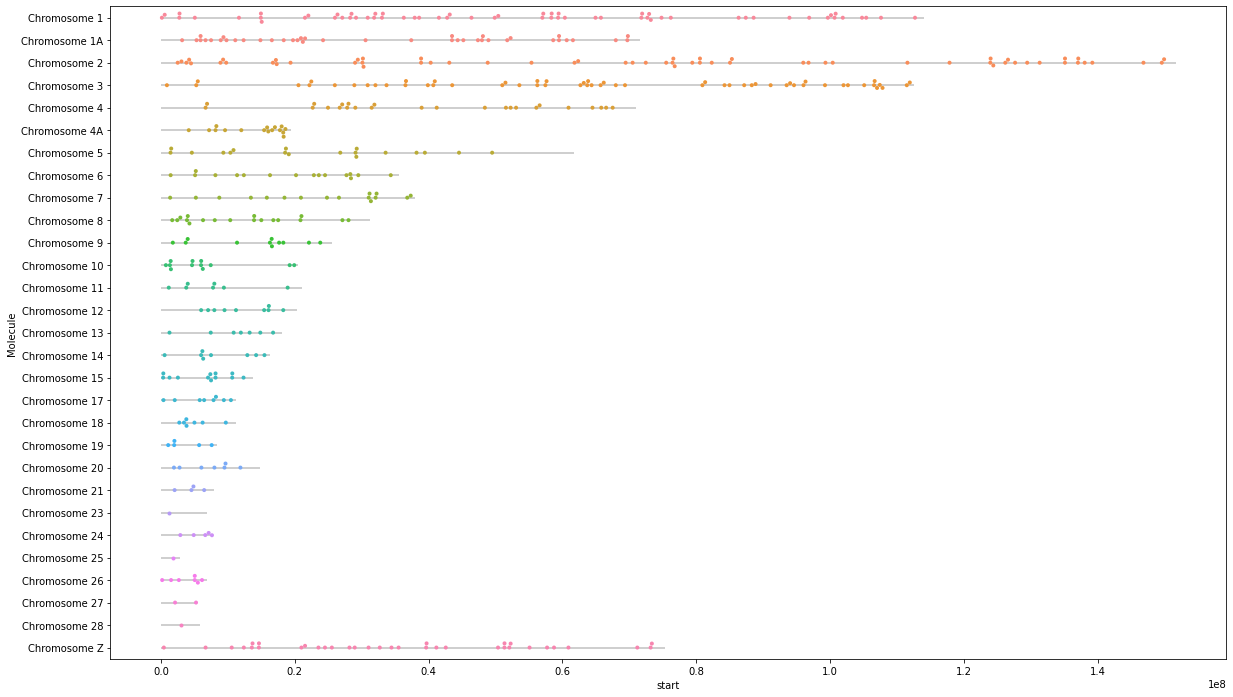

In [140]:
df_fixed3 = df_fixed2[df_fixed2['p_adjust']<0.05]
plt.figure(figsize=(20,12))
sns.swarmplot(data = df_fixed3, x = 'start', y = 'Molecule', size=4)

for k, mol in enumerate(df_fixed3['Molecule'].unique()):
    plt.hlines(k, 0, df2[df2['Molecule'] == mol]['Total Length'].values[0], color='gray', alpha=0.5)


plt.savefig('/Users/aleksandradenisova/Desktop/coursework/pics/coursework/{}.png'.format('chromosome_dist'), dpi=400)

In [141]:
# cons_in_table = ['cons','inno','non_inno']

# for i in range(len(cons_in_table)):
#     df_fixed3 = df_fixed2[df_fixed2[cons_in_table[i]]==True]
#     plt.figure(figsize=(20,12))
#     sns.swarmplot(data = df_fixed3, x = 'start', y = 'Molecule', size=3)

#     for k, mol in enumerate(df_fixed3['Molecule'].unique()):
#         plt.hlines(k, 0, df2[df2['Molecule'] == mol]['Total Length'].values[0], color='gray', alpha=0.5)


#     plt.savefig('{}.png'.format(cons_in_table[i]), dpi=300)